In [558]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import scipy.stats as stats
from sklearn.metrics import r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf

iris = fetch_ucirepo(id=53)

x = iris.data.features
y = iris.data.targets

In [559]:
iris_data_set = x.join(y)
iris_data = iris_data_set.loc[iris_data_set['class'] == 'Iris-versicolor']
iris_data = iris_data.iloc[:, 0:3]

In [560]:
iris_data

,sepal length,sepal width,petal length
50,7.0,3.2,4.7
51,6.4,3.2,4.5
52,6.9,3.1,4.9
53,5.5,2.3,4.0
54,6.5,2.8,4.6
55,5.7,2.8,4.5
56,6.3,3.3,4.7
57,4.9,2.4,3.3
58,6.6,2.9,4.6
59,5.2,2.7,3.9


In [561]:
iris_data.reset_index(drop=True, inplace=True)

In [562]:
iris_data

,sepal length,sepal width,petal length
0,7.0,3.2,4.7
1,6.4,3.2,4.5
2,6.9,3.1,4.9
3,5.5,2.3,4.0
4,6.5,2.8,4.6
5,5.7,2.8,4.5
6,6.3,3.3,4.7
7,4.9,2.4,3.3
8,6.6,2.9,4.6
9,5.2,2.7,3.9


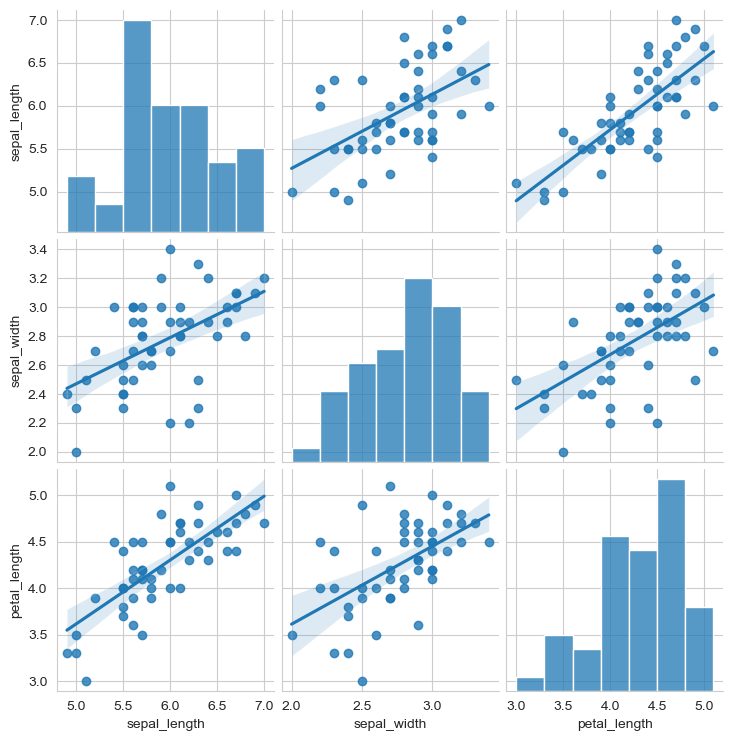

In [563]:
iris_data.columns = ['sepal_length', 'sepal_width', 'petal_length']
sns.pairplot(iris_data, diag_kind="hist", kind='reg')

## в предыдущей лабораторной работе было получено что гипотезы о том, что sepal_width и sepal_length имеют нормальное распределение не отклонялись 

## проверка petal_length на нормальность

(array([ 1.,  4.,  3., 11., 10., 15.,  6.]),
 array([3. , 3.3, 3.6, 3.9, 4.2, 4.5, 4.8, 5.1]),
 <BarContainer object of 7 artists>)

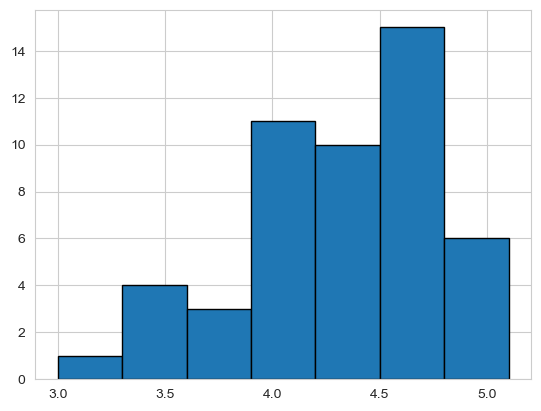

In [564]:
n = int(np.ceil(np.log2(50) + 1))
plt.hist(iris_data.petal_length, bins=n, edgecolor='black')

((array([-2.20385432, -1.83293478, -1.61402323, -1.45296849, -1.32267759,
         -1.21163342, -1.113805  , -1.02561527, -0.94475674, -0.86964726,
         -0.79915021, -0.73241807, -0.66879925, -0.6077796 , -0.54894415,
         -0.49195112, -0.43651377, -0.38238727, -0.32935914, -0.27724191,
         -0.2258675 , -0.17508277, -0.12474591, -0.07472335, -0.02488719,
          0.02488719,  0.07472335,  0.12474591,  0.17508277,  0.2258675 ,
          0.27724191,  0.32935914,  0.38238727,  0.43651377,  0.49195112,
          0.54894415,  0.6077796 ,  0.66879925,  0.73241807,  0.79915021,
          0.86964726,  0.94475674,  1.02561527,  1.113805  ,  1.21163342,
          1.32267759,  1.45296849,  1.61402323,  1.83293478,  2.20385432]),
  array([3. , 3.3, 3.3, 3.5, 3.5, 3.6, 3.7, 3.8, 3.9, 3.9, 3.9, 4. , 4. ,
         4. , 4. , 4. , 4.1, 4.1, 4.1, 4.2, 4.2, 4.2, 4.2, 4.3, 4.3, 4.4,
         4.4, 4.4, 4.4, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.6, 4.6, 4.6,
         4.7, 4.7, 4.7, 4.7, 4.7, 4.

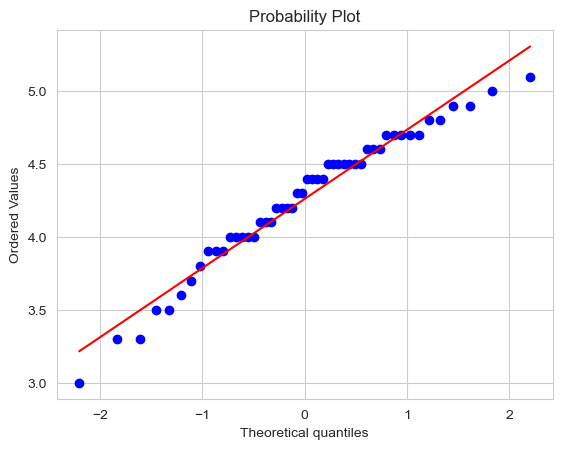

In [565]:
stats.probplot(iris_data.petal_length, dist="norm", plot=plt)

In [566]:
ks_statistic, ks_pvalue = stats.kstest(iris_data.petal_length, 'norm',
                                       args=(iris_data.petal_length.mean(), iris_data.petal_length.std()))
print("p-value ks-test", ks_pvalue)

p-value ks-test 0.4642415222366043


In [567]:
shapiro_stat, p_value = stats.shapiro(iris_data.petal_length)
print("p-value shapiro-test",  p_value)

p-value shapiro-test 0.15847783815657984


## sepal_length и sepal_width

In [568]:
correlation, p_value = stats.pearsonr(iris_data.sepal_length, iris_data.sepal_width)
print(correlation, p_value)

0.5259107172828249 8.771860011973769e-05


## sepal_length и petal_length

In [569]:
correlation, p_value = stats.pearsonr(iris_data.sepal_length, iris_data.petal_length)
print(correlation, p_value)

0.7540489585920163 2.586189505280909e-10


## sepal_width и petal_length

In [570]:
correlation, p_value = stats.pearsonr(iris_data.sepal_width, iris_data.petal_length)
print(correlation, p_value)

0.5605220916929822 2.3021679804283502e-05


<Axes: >

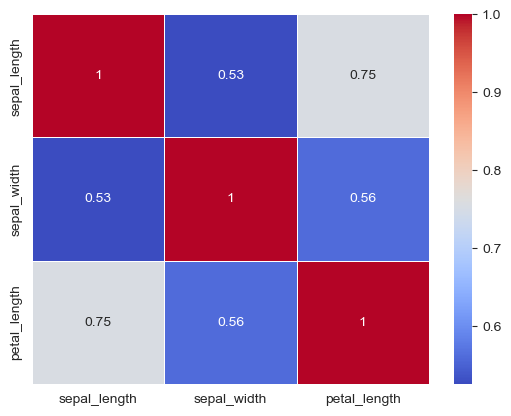

In [571]:
corr_matrix = iris_data.corr(method='pearson')
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

In [572]:
x = iris_data[['petal_length', 'sepal_width']]
y = iris_data['sepal_length']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

In [573]:
x_train_with_const = sm.add_constant(x_train)
x_test_with_const = sm.add_constant(x_test)

In [574]:
formula = 'sepal_length ~ petal_length + sepal_width'
train_data = pd.concat([x_train, y_train], axis=1)
model = smf.ols(formula=formula, data=train_data).fit()

In [575]:
y_pred = model.predict(x_test_with_const)
mse = mean_squared_error(y_test, y_pred)
print(model.summary())
print("MSE:", mse)
r2_test_full = r2_score(y_test, y_pred)
print('R^2', r2_test_full)

                            OLS Regression Results                            
Dep. Variable:           sepal_length   R-squared:                       0.578
Model:                            OLS   Adj. R-squared:                  0.558
Method:                 Least Squares   F-statistic:                     28.81
Date:                Sat, 18 Jan 2025   Prob (F-statistic):           1.33e-08
Time:                        13:13:22   Log-Likelihood:                -15.683
No. Observations:                  45   AIC:                             37.37
Df Residuals:                      42   BIC:                             42.79
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.1163      0.534      3.964   

In [576]:
x_train_reduced = x_train[['petal_length']]
x_test_reduced = x_test[['petal_length']]
data_train_reduced = pd.concat([x_train_reduced, y_train], axis=1)
formula1 = 'sepal_length ~ petal_length'

In [577]:
model_reduced = smf.ols(formula=formula1, data=data_train_reduced).fit()
y_pred_reduced = model_reduced.predict(sm.add_constant(x_test_reduced))
mse_reduced = mean_squared_error(y_test, y_pred_reduced)
print(model_reduced.summary())
print("MSE:", mse_reduced)
r2_test_reduced = r2_score(y_test, y_pred_reduced)
print('R^2:', r2_test_reduced)


                            OLS Regression Results                            
Dep. Variable:           sepal_length   R-squared:                       0.562
Model:                            OLS   Adj. R-squared:                  0.552
Method:                 Least Squares   F-statistic:                     55.18
Date:                Sat, 18 Jan 2025   Prob (F-statistic):           3.10e-09
Time:                        13:13:22   Log-Likelihood:                -16.541
No. Observations:                  45   AIC:                             37.08
Df Residuals:                      43   BIC:                             40.70
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.4280      0.478      5.075   

In [578]:
y_train_pred = model_reduced.predict(x_train_reduced)
residuals = y_train - y_train_pred
y_test_pred = model_reduced.predict(x_test_reduced)
residuals_test = y_test - y_test_pred

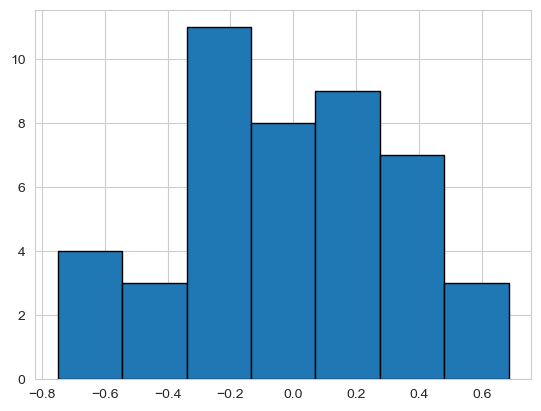

In [579]:
n = int(np.ceil(np.log2(len(residuals)) + 1))
plt.hist(residuals, bins=n, edgecolor='black')
plt.show()

((array([-2.16261902, -1.78552545, -1.56210618, -1.397212  , -1.26342445,
         -1.1490787 , -1.04806126, -0.95674251, -0.87277802, -0.79455752,
         -0.72092154, -0.65100286, -0.58413203, -0.51977796, -0.45750906,
         -0.39696667, -0.33784646, -0.27988499, -0.22284956, -0.16653055,
         -0.11073524, -0.05528282,  0.        ,  0.05528282,  0.11073524,
          0.16653055,  0.22284956,  0.27988499,  0.33784646,  0.39696667,
          0.45750906,  0.51977796,  0.58413203,  0.65100286,  0.72092154,
          0.79455752,  0.87277802,  0.95674251,  1.04806126,  1.1490787 ,
          1.26342445,  1.397212  ,  1.56210618,  1.78552545,  2.16261902]),
  array([-0.74928242, -0.64545964, -0.56658622, -0.54928242, -0.49737103,
         -0.4531052 , -0.44928242, -0.32232039, -0.30119381, -0.25692798,
         -0.2358014 , -0.21849761, -0.21467483, -0.20119381, -0.18006723,
         -0.15692798, -0.14928242, -0.14928242, -0.13197862, -0.11849761,
         -0.0531052 , -0.01467483, -

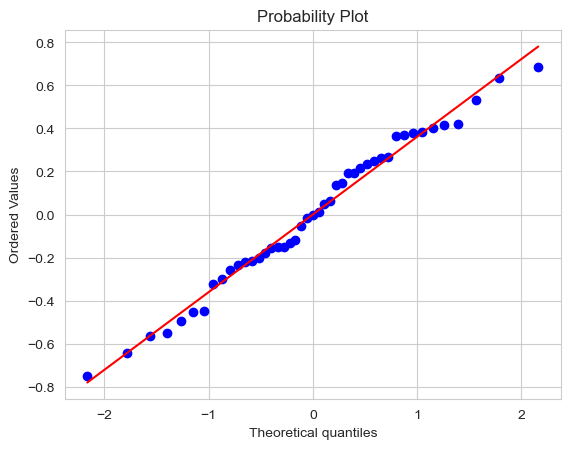

In [580]:
stats.probplot(residuals, dist="norm", plot=plt)

In [581]:
ks_statistic1, ks_pvalue1 = stats.kstest(residuals, 'norm', args=(residuals.mean(), residuals.std()))
print("p-value ks-test", ks_pvalue1)

p-value ks-test 0.8865271519551005


In [582]:
shapiro_stat, p_value = stats.shapiro(residuals)
print("p-value shapiro-test", p_value)

p-value shapiro-test 0.6367716085812936


<Axes: >

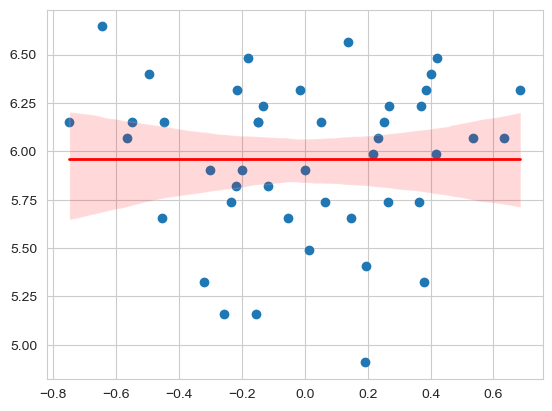

In [583]:
plt.scatter(residuals, y_train_pred)
sns.regplot(x=residuals, y=y_train_pred, scatter=False, color='red', line_kws={'linewidth': 2, 'linestyle': '-'})

In [584]:
anova_result = sm.stats.anova_lm(model_reduced, typ=2)
print(anova_result)

                sum_sq    df          F        PR(>F)
petal_length  7.052332   1.0  55.179879  3.102106e-09
Residual      5.495668  43.0        NaN           NaN
